In [1]:
import requests
from urllib.parse import urlencode

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/Y4-LEMm9mmjUnQ'  

*Получаем загрузочную ссылку*

In [2]:
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

*Загружаем файл и сохраняем его в локальное хранилище*

In [3]:
download_response = requests.get(download_url)
with open('music_data.csv', 'wb') as f:   # Здесь укажите нужный путь к файлу
    f.write(download_response.content)

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('music_data.csv',index_col = 'Unnamed: 0')

*Смотрим на структуру таблицы*

In [6]:
data.head()

audition_id  track_duration track_genre  \
0  3fecd60bf5564de7bb0064335f482b4d      336.629082         RAP   
1  8ae1703df8354ee6b8d39ce2ceae4508      428.797846       VOCAL   
2  44383125d98a4d939e7f294602674fc6      463.467143       METAL   
3  a90b74992c9f4046a68935cb83ced7ee      323.746259    HARDROCK   
4  0d98a88fba0a4dc3bb0444089a0ce16b      316.888403         POP   

                               track_id               user_id  \
0  efd614e5-239a-418e-b39c-181b43719b62  a72d73ea124840698aa8   
1  d4697e6e-698a-41e8-8e15-ec890c94751e  066cc9287de340f281ba   
2  e006afab-c832-4d07-8cd0-7d4a9c2aabe8  95ed23b52b104f66b4b1   
3  c2ea845c-fcba-480a-b41a-d58bf9493375  b0a6dcec6f604b50b37e   
4  ad68738c-2a38-4e0f-910a-71bb0aa0a0c0  6788b1c78a724de488c9   

         utc_audition_end_dttm      utc_audition_start_dttm  
0  2021-02-28T12:32:10.776000Z  2021-02-28T12:31:01.865000Z  
1  2021-01-19T12:13:43.369000Z  2021-01-19T12:12:48.185000Z  
2  2021-02-27T19:53:57.143000Z  2021-02-27T19:52:42.470000Z  
3  2021-02-24T01:51:44.526000Z  2021-02-24T01:46:25.549000Z  
4  2020-12-24T05:04:32.855000Z  2020-12-24T05:00:09.645000Z

*Проверяем таблицу на пустые значения, убеждаемся, что их нет.*

*Смотрим типы столбцов, видим, что столбцы со временем имеют тип object*


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842397 entries, 0 to 842396
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   audition_id              842397 non-null  object 
 1   track_duration           842397 non-null  float64
 2   track_genre              842397 non-null  object 
 3   track_id                 842397 non-null  object 
 4   user_id                  842397 non-null  object 
 5   utc_audition_end_dttm    842397 non-null  object 
 6   utc_audition_start_dttm  842397 non-null  object 
dtypes: float64(1), object(6)
memory usage: 51.4+ MB


Смотрим на уникальные значения столбца с жанрами

In [8]:
data.track_genre.unique()

array(['RAP', 'VOCAL', 'METAL', 'HARDROCK', 'POP', 'BLUES', 'DUBSTEP',
       'ELECTRONICS', 'ROCK', 'TECHNO', 'DISCO', 'KPOP', 'PODCASTS',
       'DANCE', 'HOUSE', 'INDUSTRIAL', 'RNB', 'JAZZ', 'CLASSICAL',
       'RELAX', 'POSTROCK', 'PUNK'], dtype=object)

*Переводим столбцы со временем в тип datetime.*

*Добавляем к таблице столбцы с продолжительностью прослушивания трека и процента прослушанного времени от продолжительности трека*

In [9]:
data[['utc_audition_end_dttm','utc_audition_start_dttm']] = \
    data[['utc_audition_end_dttm','utc_audition_start_dttm']].apply(pd.to_datetime)
data['listening_time'] = (data.utc_audition_end_dttm - data.utc_audition_start_dttm).dt.total_seconds()
data['part_of_track'] = data.listening_time / data.track_duration * 100

In [10]:
data.head()

audition_id  track_duration track_genre  \
0  3fecd60bf5564de7bb0064335f482b4d      336.629082         RAP   
1  8ae1703df8354ee6b8d39ce2ceae4508      428.797846       VOCAL   
2  44383125d98a4d939e7f294602674fc6      463.467143       METAL   
3  a90b74992c9f4046a68935cb83ced7ee      323.746259    HARDROCK   
4  0d98a88fba0a4dc3bb0444089a0ce16b      316.888403         POP   

                               track_id               user_id  \
0  efd614e5-239a-418e-b39c-181b43719b62  a72d73ea124840698aa8   
1  d4697e6e-698a-41e8-8e15-ec890c94751e  066cc9287de340f281ba   
2  e006afab-c832-4d07-8cd0-7d4a9c2aabe8  95ed23b52b104f66b4b1   
3  c2ea845c-fcba-480a-b41a-d58bf9493375  b0a6dcec6f604b50b37e   
4  ad68738c-2a38-4e0f-910a-71bb0aa0a0c0  6788b1c78a724de488c9   

             utc_audition_end_dttm          utc_audition_start_dttm  \
0 2021-02-28 12:32:10.776000+00:00 2021-02-28 12:31:01.865000+00:00   
1 2021-01-19 12:13:43.369000+00:00 2021-01-19 12:12:48.185000+00:00   
2 2021-02-27 19:53:57.143000+00:00 2021-02-27 19:52:42.470000+00:00   
3 2021-02-24 01:51:44.526000+00:00 2021-02-24 01:46:25.549000+00:00   
4 2020-12-24 05:04:32.855000+00:00 2020-12-24 05:00:09.645000+00:00   

   listening_time  part_of_track  
0          68.911      20.470899  
1          55.184      12.869468  
2          74.673      16.111822  
3         318.977      98.526853  
4         263.210      83.060787

*Смотрим на основные показатели численных столбцов*

In [11]:
data.describe()

track_duration  listening_time  part_of_track
count   842397.000000   842397.000000  842397.000000
mean       651.026261      425.734771      65.438708
std        900.259585      696.770853      33.629067
min        240.635442        0.005000       0.001425
25%        366.486757      128.322000      27.494265
50%        407.273724      316.265000      80.609942
75%        465.304148      397.080000      93.313640
max       4786.285463     5854.082000     140.100504

*Построим распределение продолжительности прослушивания треков*

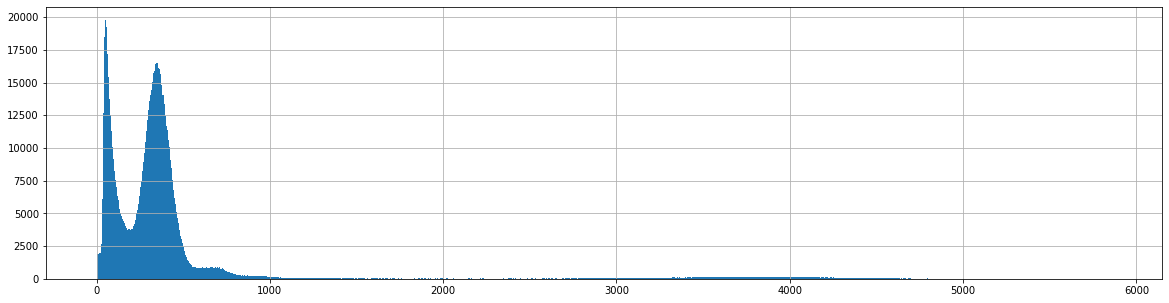

In [12]:
data.listening_time.hist(bins = 1000, figsize = (20,5))

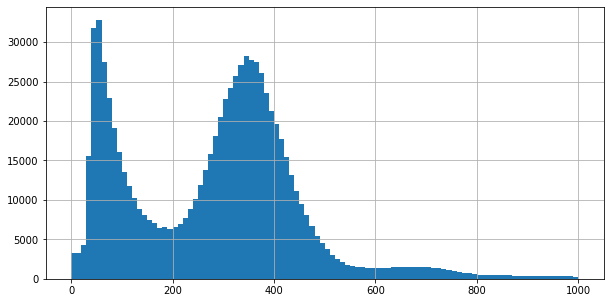

In [13]:
data.query('listening_time < 1000').listening_time.hist(bins = 100, figsize = (10,5))

*Построим распределение процента прослушанного времени от продолжительности трека*

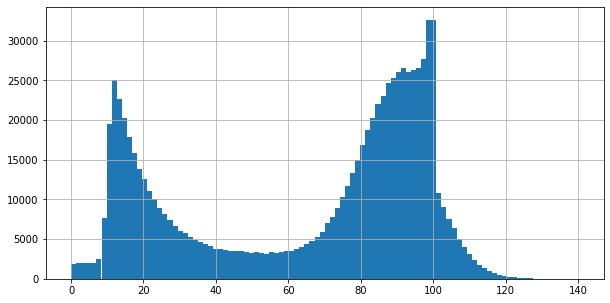

In [14]:
data.part_of_track.hist(bins = 100, figsize = (10,5))

*Если учесть, что фестиваль будет проходить в формате офлайн и цена билета составляет 700 рублей, то можно сделать вывод, что это мероприятие  посетят пользователи, у которых жанр техно находится в топе любимых, но могут не являться ярыми фанатами этого жанра, так как цена билета для подобного мероприятия невелика. Будем учитывать только те логи, где явно можно сказать, что пользователь не пропустил песню или быстро переключил.*

*Продолжительность песен многих жанров находится примерно в одном и том же диапазоне, но есть жанры, например, подкасты, у которых продолжительность на порядок выше, чем у обычных песен, поэтому ограничивать нашу выборку логов по времени было бы не совсем корректно. Сделаем выборку опираясь распределение процента прослушанного времени от продолжительности трека. Оставим в нашем внимании только те логи, которые входят в первый пик и дальше, то есть где процент не менее 10. Минимальная продолжительность трека в наших данных - 240 сек.24 секунды вполне достаточно, чтобы сделать выводы о первом впечатлении о песне.*

*Так же необхоимо учесть количество записей для каждого пользователя, так как есть вероятность неверно сделать вывод о его предпочтениях, опираясь на маленькое число записей.*


*Стоит обратить внимание на количество уникальных треков в стиле техно в записях каждого пользователя, так как нельзя сказать, что человек является фанатом этого жанра, если условные 50 прослушиваний песен в этом стиле пришлось на 3 трека. Это значит, что ему нравятся именно эти треки, а не жанр. Будем отбирать пользователей, у которых количество уникальных треков в стиле техно не менее 7.*


In [15]:
uniq_user = data.user_id.nunique()
uniq_user

1727

In [16]:
data_music = data.query('part_of_track >= 10')

In [17]:
data_music.groupby('user_id').user_id.count().min()

66

*Минимальное количество записей для каждого пользователя равно 66, этого количества хватит для того, чтобы сделать приблизительные выводы о его предпочтениях.*

In [18]:
data_music_tech = data_music.query('track_genre == "TECHNO"') \
    .pivot_table(index = 'user_id', values = 'track_id', aggfunc = {'track_id':['count','nunique']}) \
    .reset_index().rename(columns = {'count' : 'number_of_techno','nunique' : 'uniq_techno' }) \
    .query('uniq_techno >= 7')
data_music_tech.head()

user_id  number_of_techno  uniq_techno
0  002123faf66b47b5aafa                23           22
1  0041383820e248e487a6                76           67
2  008005a451764a63aa3f                40           37
3  00c017dc34254d39a390                49           49
4  00f628a2f8044ae18d88                35           34

*В data_music_tech остались лишь те пользователи, у которых процент прослушанного времени от продолжительности трека не менее 10
и в логах количество уникальных песен в стиле техно не менее 7.*

*Определим для каждого пользователя топ-5 жанров*

In [19]:
top_genre = data_music.query('user_id in @data_music_tech.user_id') \
    .pivot_table(index = ['user_id','track_genre'], values = 'audition_id', aggfunc = 'count') \
    .sort_values(['user_id', 'audition_id'], ascending = False).groupby('user_id').head(5)

In [20]:
top_genre.head(15)

audition_id
user_id              track_genre             
ffe8e02a691746d18159 POP                   76
                     ROCK                  45
                     RAP                   42
                     KPOP                  37
                     PODCASTS              34
ffa5ecacdcfb466d8e91 POP                   81
                     ROCK                  53
                     RAP                   48
                     KPOP                  40
                     HARDROCK              39
ffa2421c514844c087f3 POP                  108
                     RAP                   74
                     ROCK                  68
                     HARDROCK              43
                     PODCASTS              36

*Найдем жанры которые встречались в рейтинге топ-5 и сколько раз.*

In [21]:
top_genre.reset_index().track_genre.value_counts()

POP            1723
ROCK           1718
RAP            1656
TECHNO         1001
HARDROCK        771
METAL           467
KPOP            401
PODCASTS        351
DUBSTEP         334
ELECTRONICS      99
VOCAL            94
Name: track_genre, dtype: int64

*Как мы видим, практичеки у всех пользователей в топ-5 присутствует такие жанры музыки как поп, рок и рэп, причем с солидным отрывом. Будем считать, что пользователю нравится жанр техно, если он находится в топ-5 его любимых, так как он будет любимым, не считая "большую тройку". Отберем id таких пользователей.*

In [22]:
id_user_techno = top_genre.reset_index().query('track_genre == "TECHNO"')['user_id']

In [23]:
id_user_techno.head()

22    ff77d34a23c04d36a421
34    ff122fc8c3354f059efa
54    fdcf02438ec84b599099
59    fdbf9b908a0a42bebf58
69    fd7a520bcda845caa558
Name: user_id, dtype: object

*Прежде чем объявлять этих пользователей любителями жанра техно, необходимо посчитать для них долю записей с песнями жанра техно. Среди этих пользователей могут быть такие, кто слушает почти всегда "большую тройку" и жанр техно затесался на 4-5 месте случайно, то есть ему безразличны все остальные жанры кроме этих трех.*

In [24]:
data_1 = data_music_tech.query('user_id in @id_user_techno')

In [33]:
data_2 = data_music.query('user_id in @id_user_techno') \
    .pivot_table(index = 'user_id', values = 'audition_id', aggfunc = 'count') \
    .reset_index().rename(columns = {'audition_id' : 'number_of_log'})

In [26]:
data_user = data_2.merge(data_1, how = 'inner', on = 'user_id' )

In [27]:
data_user['part_techno'] = data_user.number_of_techno/data_user.number_of_log

In [28]:
data_user.head()

user_id  number_of_log  number_of_techno  uniq_techno  \
0  0041383820e248e487a6           1040                76           67   
1  008005a451764a63aa3f            614                40           37   
2  00c017dc34254d39a390            617                49           49   
3  00f628a2f8044ae18d88            408                35           34   
4  013962f5b3f9491dac4f            515                42           38   

   part_techno  
0     0.073077  
1     0.065147  
2     0.079417  
3     0.085784  
4     0.081553

*Построим распределение доли записей с треками жанра техно*

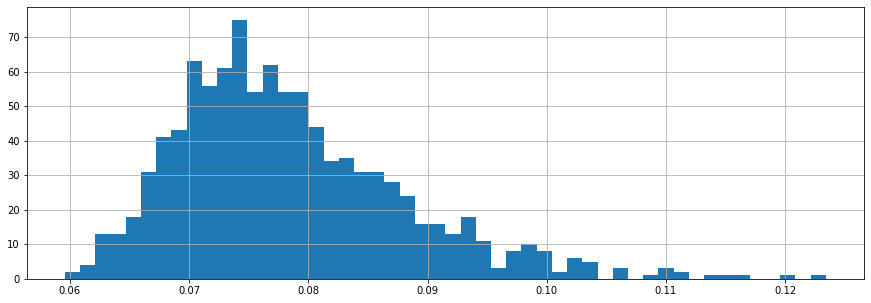

In [29]:
data_user.part_techno.hist(bins = 50,figsize = (15,5))

*Будем учитывать только тех пользоваталей, у которых доля составляет не менее 0.07*

In [30]:
user_techno_fest = data_user.query('part_techno >= 0.07').user_id

In [31]:
user_techno_fest.head()

0    0041383820e248e487a6
2    00c017dc34254d39a390
3    00f628a2f8044ae18d88
4    013962f5b3f9491dac4f
5    016ab75e22374843b684
Name: user_id, dtype: object

In [32]:
user_techno_fest.count()

825

*В user_techno_fest находятся id пользоватлей, которым необходимо отправить email о предстоящем фестивале*